<a href="https://colab.research.google.com/github/RohitManey/MLProjects/blob/main/NYC_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split
from tensorflow.python.util.tf_export import keras_export
print(tf.__version__)

2.15.0


In [ ]:
!git clone https://github.com/RohitManey/MLProjects.git

Cloning into 'MLProjects'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 2.41 MiB | 5.44 MiB/s, done.


Load the data and take a look :')

In [ ]:
data = pd.read_csv('/content/MLProjects/NYC AIRBNB/AB_NYC_2019.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.shape

(48895, 16)

In [ ]:
features = data [['neighbourhood_group','room_type','price','minimum_nights','number_of_reviews',
                 'reviews_per_month', 'calculated_host_listings_count','availability_365']]

In [ ]:
features.isna().sum()

neighbourhood_group                   0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#fill the null values with 0
features['reviews_per_month'] = features['reviews_per_month'].fillna(0)

<ipython-input-9-14dd55eac5fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['reviews_per_month'] = features['reviews_per_month'].fillna(0)


In [ ]:
features.isna().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
Onehot_neighbourGroup = pd.get_dummies(features['neighbourhood_group'])
Onehot_room_type= pd.get_dummies(features['room_type'])

features = features.drop(columns=['neighbourhood_group','room_type'])
features = pd.concat([features,Onehot_neighbourGroup,Onehot_room_type],axis=1)
print(":::::::::A look at the new table :::::::: \n")
features.head(2)


:::::::::A look at the new table :::::::: 



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0


In [ ]:
# This is the feature that we want to predict
targets =features['price']


In [ ]:
features.shape

(48895, 14)

In [ ]:
features.head(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0


In [ ]:
# Splitting the data as training data and testing data
X_Train,X_Test,Y_Train,Y_Test= train_test_split(features,targets,test_size=0.3)

In [ ]:
X_Train.shape

(34226, 14)

In [ ]:
Y_Train.shape

(34226,)

In [ ]:
X_Test.shape

(14669, 14)

Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-60-7eb0b3a31d96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

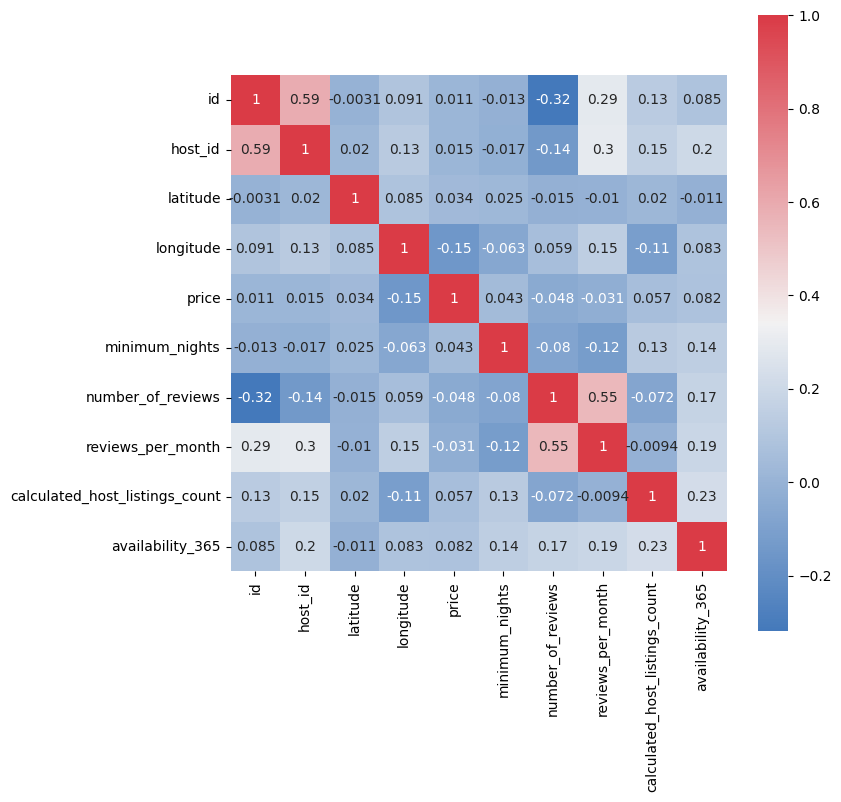

In [ ]:
corr = data.corr()
cmap= sns.diverging_palette(250,10,as_cmap=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr,square=True,cmap=cmap,annot=True)

Model Building

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.1),
                            tf.keras.layers.Dense(1)])

In [ ]:
optimizer_fn= tf.keras.optimizers.Adam()
loss_fn= tf.keras.losses.MAE
model.compile(optimizer=optimizer_fn,
              loss= loss_fn,
              metrics=[tf.keras.metrics.MAE])

In [ ]:

model.fit(X_Train,Y_Train,epochs=15)

Epoch 1/15
1070/1070 [==============================] - 2s 2ms/step - loss: 13.2338 - mean_absolute_error: 13.2338
Epoch 2/15
1070/1070 [==============================] - 2s 2ms/step - loss: 6.6238 - mean_absolute_error: 6.6238
Epoch 3/15
1070/1070 [==============================] - 2s 2ms/step - loss: 6.1257 - mean_absolute_error: 6.1257
Epoch 4/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.8867 - mean_absolute_error: 5.8867
Epoch 5/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.7391 - mean_absolute_error: 5.7391
Epoch 6/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.6715 - mean_absolute_error: 5.6715
Epoch 7/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.5395 - mean_absolute_error: 5.5395
Epoch 8/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.5255 - mean_absolute_error: 5.5255
Epoch 9/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.5400 - mean_abso

In [ ]:
model.evaluate(X_Test,Y_Test)

459/459 [==============================] - 1s 1ms/step - loss: 2.6546 - mean_absolute_error: 2.6546


[2.654566764831543, 2.654566764831543]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1920      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2049 (8.00 KB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizer_fn,
              loss= loss_fn,
              metrics=[tf.keras.metrics.MAE,
                       tf.keras.metrics.MSE])

In [ ]:
model.fit(X_Train,Y_Train,epochs=15)

Epoch 1/15
1070/1070 [==============================] - 3s 2ms/step - loss: 5.3854 - mean_absolute_error: 5.3854 - mean_squared_error: 139.8868
Epoch 2/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.3355 - mean_absolute_error: 5.3355 - mean_squared_error: 176.6505
Epoch 3/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.4148 - mean_absolute_error: 5.4148 - mean_squared_error: 118.5417
Epoch 4/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.4001 - mean_absolute_error: 5.4001 - mean_squared_error: 156.0743
Epoch 5/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.3929 - mean_absolute_error: 5.3929 - mean_squared_error: 126.6406
Epoch 6/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.3515 - mean_absolute_error: 5.3515 - mean_squared_error: 125.8609
Epoch 7/15
1070/1070 [==============================] - 2s 2ms/step - loss: 5.3278 - mean_absolute_error: 5.3278 - mean_squared_error: 1

In [ ]:
model.evaluate(X_Test,Y_Test)

459/459 [==============================] - 1s 1ms/step - loss: 1.2728 - mean_absolute_error: 1.2728 - mean_squared_error: 7.4920


[1.2728134393692017, 1.2728134393692017, 7.492033004760742]

In [ ]:
model.predict(X_Test[:2])

1/1 [==============================] - 0s 109ms/step


array([[272.6492  ],
       [ 41.386353]], dtype=float32)

In [ ]:
Y_Test[:2]

11011    275
41206     42
Name: price, dtype: int64